<a href="https://colab.research.google.com/github/Jaydip-DataAnalyst/Blinkit-Data-analysis-using-Power-BI-/blob/main/stock_movement_analysis_using_reddit_api_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 3.7 MB/s eta 0:00:00


In [1]:
pip install yfinance

In [2]:
pip install nltk==3.8.1

In [3]:
pip install textblob

In [5]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.0 MB/s eta 0:00:00


In [8]:
import praw
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from praw.models import MoreComments
import seaborn as sns

In [9]:
reddit = praw.Reddit(user_agent=True, client_id="HKflocOpruhbtDpNMpt_FA",
                    client_secret="zTiq5V4tETOGtp1rzAYyNh7kNdmMnw", username="Jaydip732", password='J@ydipk732')

In [10]:
sia = SentimentIntensityAnalyzer()

In [11]:
stock_ticker = 'AAPL'

In [12]:
subreddit = 'stockmarket'

In [13]:
posts = reddit.subreddit(subreddit).hot(limit=100)

In [17]:
sentiment_data = pd.DataFrame(columns=['post_id', 'title', 'text', 'sentiment'])

In [19]:
for post in posts:
    title = post.title
    text = post.selftext
    sentiment = sia.polarity_scores(text)
    new_row = pd.DataFrame({'title': [title], 'text': [text], 'sentiment': [sentiment['compound']]})
    sentiment_data = pd.concat([sentiment_data, new_row], ignore_index=True)

<ipython-input-19-9e2d09324951>:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  sentiment_data = pd.concat([sentiment_data, new_row], ignore_index=True)


In [21]:
avg_sentiment = sentiment_data['sentiment'].mean()

In [22]:
stock_data = yf.Ticker(stock_ticker)

In [24]:
stock_movement = stock_data.history(period='1d')['Close'].pct_change()

In [25]:
correlation = sentiment_data['sentiment'].corr(stock_movement)

In [26]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

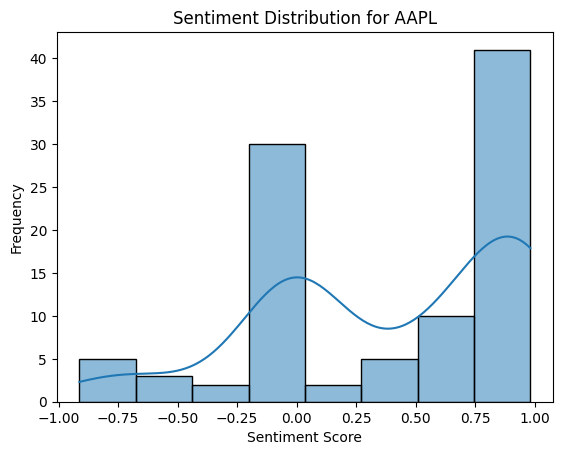

In [28]:
sns.histplot(sentiment_data['sentiment'], kde = True)
plt.title(f'Sentiment Distribution for {stock_ticker}')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

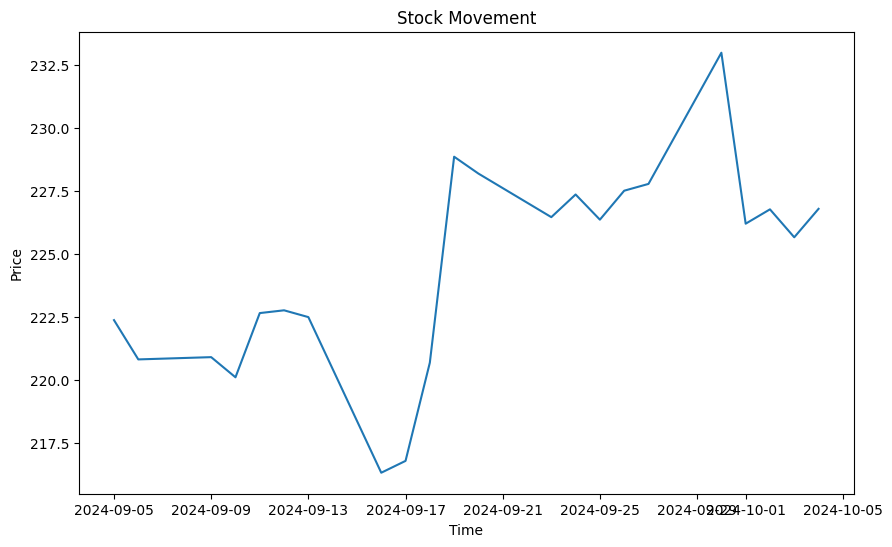

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(stock_data.history(period='1mo')['Close'])
plt.title('Stock Movement')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

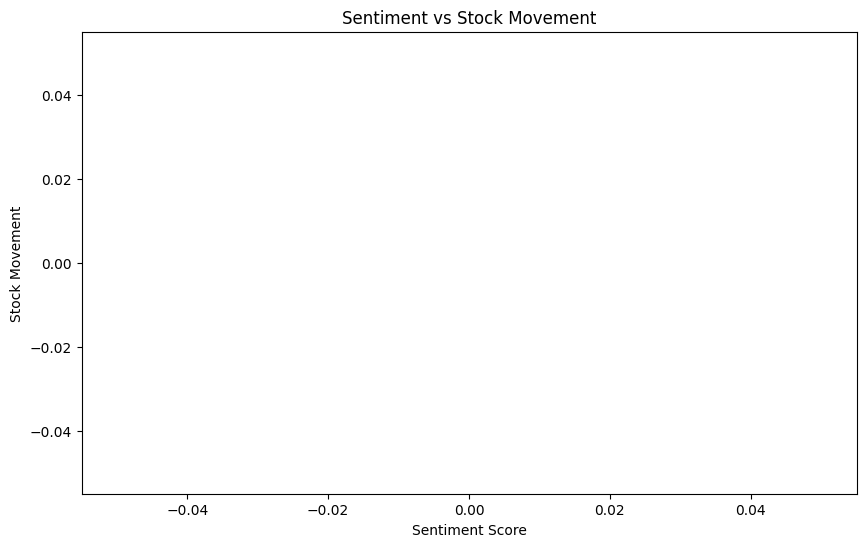

In [38]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=sentiment_data['sentiment'],  y=stock_movement)
plt.title('Sentiment vs Stock Movement')
plt.xlabel('Sentiment Score')
plt.ylabel('Stock Movement')
plt.show()

In [41]:
print(f'Average Sentiment:{avg_sentiment:.2f}')
print(f'Correlation: {correlation:.2f}')
# Convert the stock_movement Series to a single float value
# by taking the mean. Then apply the format specifier.
print(f'Stock Movement:{stock_movement.mean():.02f}%')

Average Sentiment:0.41
Correlation: nan
Stock Movement:nan%
